<a href="https://colab.research.google.com/github/Ahmedabdelalem/Cognifyz-Data-Science/blob/main/Cognifyz_Data_Science_Level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data set
data = pd.read_csv('https://raw.githubusercontent.com/Ahmedabdelalem/Cognifyz-Data-Science/refs/heads/main/Dataset%20.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Task 1: Predictive Modeling

*   Build a regression model to predict the aggregate rating of a restaurant based on available features.
*  Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
*   Experiment with different algorithms (e.g.,linear regression, decision trees, random forest) and compare their performance.




In [5]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
non_numeric_cols = ['Restaurant ID', 'Restaurant Name','City', 'Address','Locality', 'Locality Verbose','Cuisines',
                   'Currency','Switch to order menu']

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
# drop the non-numeric columns from the dataset
data_copy = data.drop(non_numeric_cols,axis=1)

In [9]:
data_copy.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
# feture processing the required columns
data_copy['Has Online delivery'] = (data_copy['Has Online delivery']=='Yes').astype('int')
data_copy['Has Table booking'] = (data_copy['Has Table booking']== 'Yes').astype('int')
data_copy['Is delivering now'] = (data_copy['Is delivering now'] == 'Yes').astype('int')

In [11]:
# one hot encoding the remaing categorical variables
data_copy = pd.get_dummies(data_copy,drop_first=True)
data_copy.head()

,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,162,121.027535,14.565443,1100,1,0,0,3,4.8,314,False,False,False,False,False,True,False,False,False,False
1,162,121.014101,14.553708,1200,1,0,0,3,4.5,591,False,False,False,False,False,True,False,False,False,False
2,162,121.056831,14.581404,4000,1,0,0,4,4.4,270,True,False,False,False,False,False,False,False,False,True
3,162,121.056475,14.585318,1500,0,0,0,4,4.9,365,False,False,False,False,False,True,False,False,False,False
4,162,121.057508,14.584450,1500,1,0,0,4,4.8,229,False,False,False,False,False,True,False,False,False,False


In [12]:
# features and target varible
X = data_copy.drop('Aggregate rating',axis =1)
y= data_copy['Aggregate rating']

In [13]:
# splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
# Train and evaluate models
models = { 'Linear Regression':LinearRegression(),
         'Decision Tree': DecisionTreeRegressor(random_state=101),
         'Random Forest': RandomForestRegressor(random_state=101)}

for name, model in models.items():
    model.fit(X_train, y_train)  # Training the model
    y_pred = model.predict(X_test)  # Predictions
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}\n")

Model: Linear Regression
Mean Squared Error: 0.0327
R-squared: 0.9854

Model: Decision Tree
Mean Squared Error: 0.0598
R-squared: 0.9732

Model: Random Forest
Mean Squared Error: 0.0327
R-squared: 0.9854



*   the Linear regression and Random forest have the similar r2 score and mean
squared error





Task 2: Customer Preference Analysis

*  Analyze the relationship between the type of cuisine and the restaurant's rating.

*   Identify the most popular cuisines among customers based on the number of votes.

*   Determine if there are any specific cuisines that tend to receive higher ratings.



In [15]:
# Group by cuisine and calculate average rating
cuisine_rating = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average rating for each cuisine:")
print(cuisine_rating)

Average rating for each cuisine:
Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64


In [16]:
# the most popular cuisines among customers based on the number of votes.
popular_cuisines = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(5)
popular_cuisines

,Votes
Cuisines,
"North Indian, Mughlai",53747
North Indian,46241
"North Indian, Chinese",42012
Cafe,30657
Chinese,21925


In [17]:
# Calculate average ratings for the top cuisines with high votes
top_cuisines = popular_cuisines.index.tolist()  # List of top cuisines
ratings_of_top_cuisines = data[data['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage rating for top cuisines based on votes:")
print(ratings_of_top_cuisines)


Average rating for top cuisines based on votes:
Cuisines
Cafe                     2.890970
North Indian, Mughlai    2.888623
North Indian, Chinese    2.421722
Chinese                  2.042090
North Indian             1.672329
Name: Aggregate rating, dtype: float64


Task 3: Data Visualization

*  Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

*   Compare the average ratings of different cuisines or cities using appropriate visualizations.

*  Visualize the relationship between various features and the target variable to gain insights.




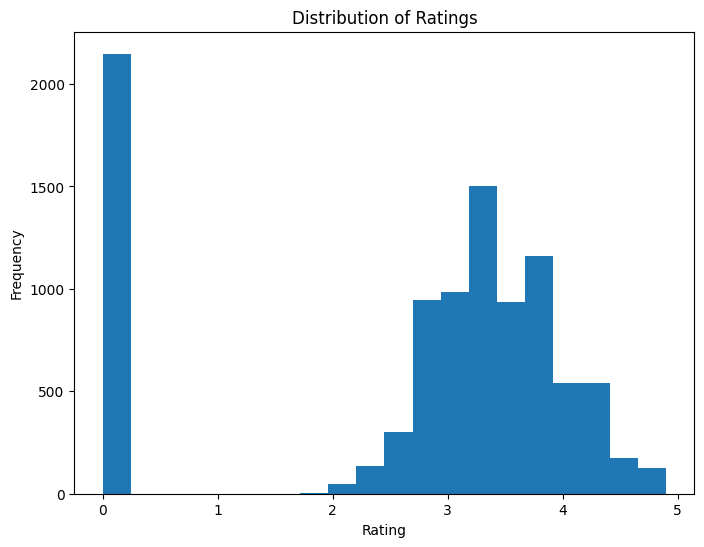

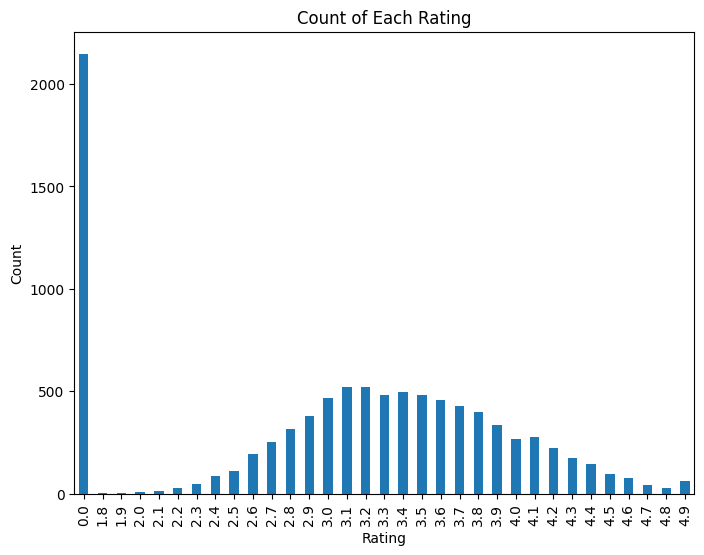

In [18]:
# Histogram for distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(data['Aggregate rating'], bins=20,)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Bar plot for count of each rating
plt.figure(figsize=(8, 6))
data['Aggregate rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Each Rating')
plt.show()

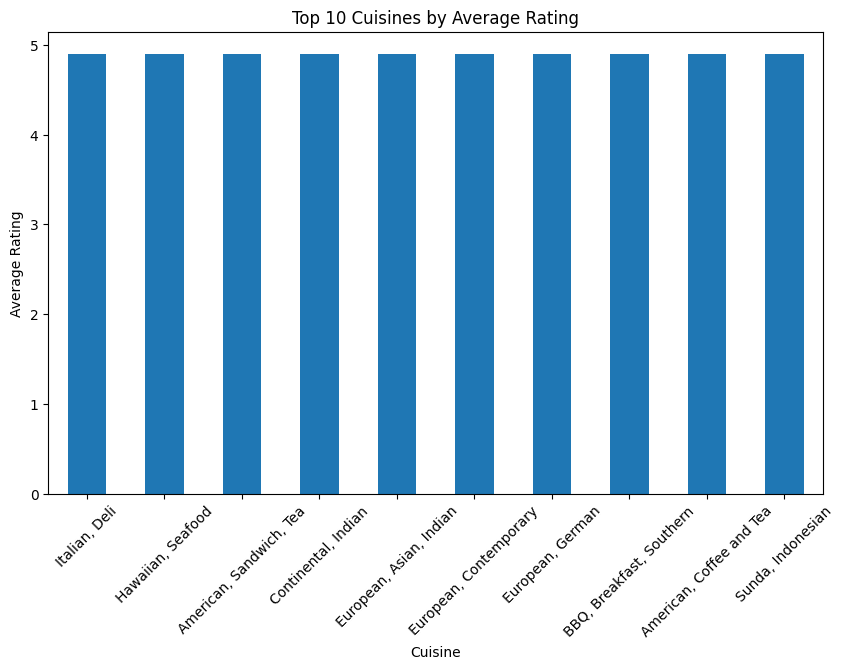

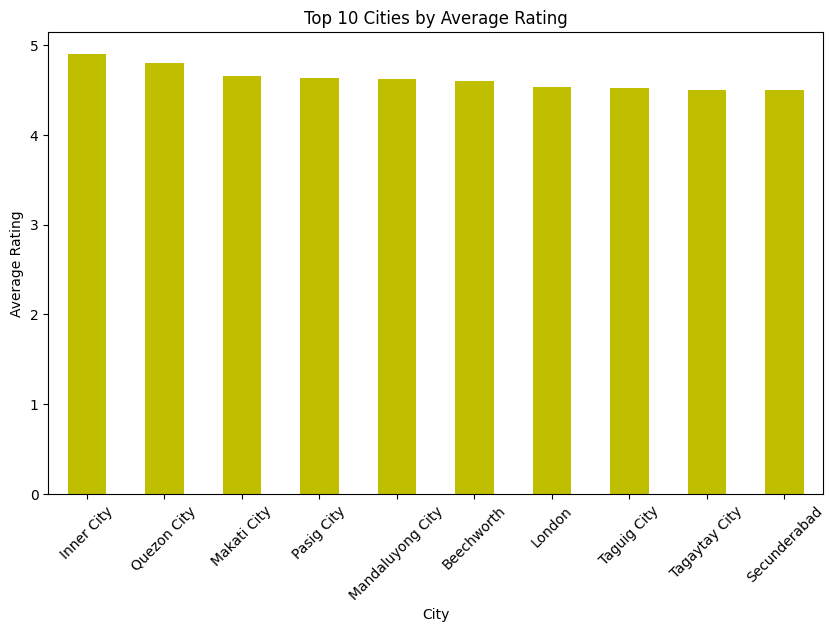

In [21]:
# Bar plot for average ratings of different cuisines
avg_rating_cuisines = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_rating_cuisines.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Top 10 Cuisines by Average Rating')
plt.xticks(rotation=45)
plt.show()

# Bar plot for average ratings of different cities
avg_rating_cities = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_rating_cities.plot(kind='bar',color='y')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Top 10 Cities by Average Rating')
plt.xticks(rotation=45)
plt.show()

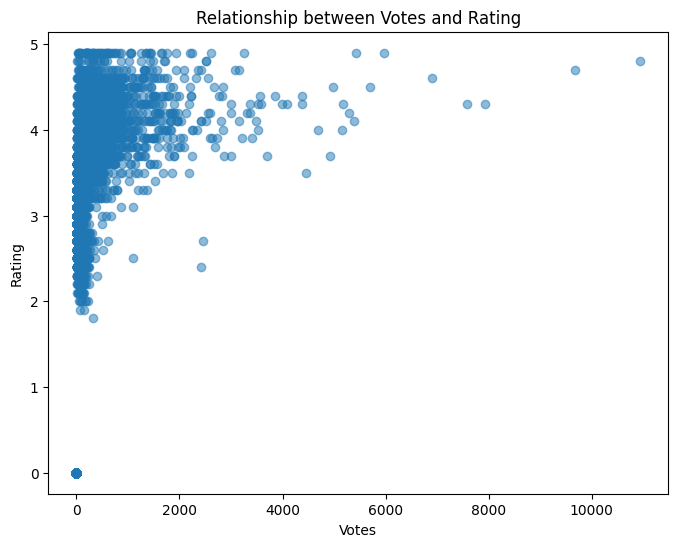

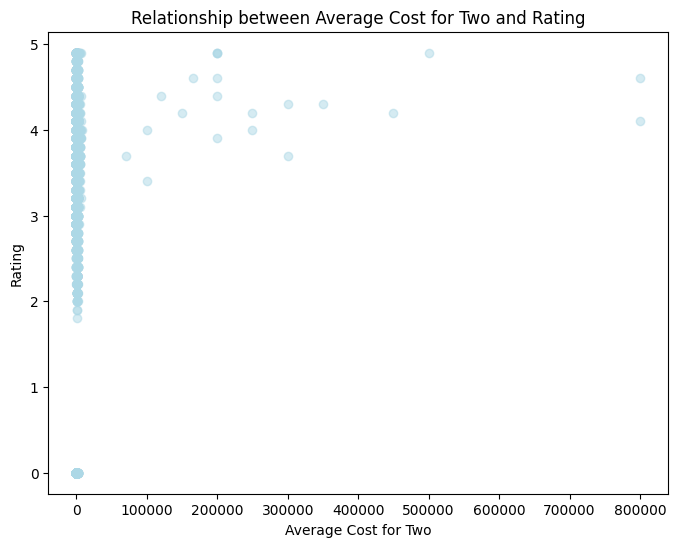

In [22]:
# Scatter plot for relationship between votes and ratings
plt.figure(figsize=(8, 6))
plt.scatter(data['Votes'], data['Aggregate rating'], alpha=0.5)
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Relationship between Votes and Rating')
plt.show()

# Scatter plot for relationship between average cost and ratings
plt.figure(figsize=(8, 6))
plt.scatter(data['Average Cost for two'], data['Aggregate rating'], alpha=0.5, color='lightblue')
plt.xlabel('Average Cost for Two')
plt.ylabel('Rating')
plt.title('Relationship between Average Cost for Two and Rating')
plt.show()